# Estimation of the absolute free energy of binding

The free energy of binding for each simulation system is estimated from a series of legs along a thermodynamic cycle. The ∆G of binding should be:

<center>
∆G_1 + ∆G_2 + ∆G_3 + ∆G_4
</center>

where
* ∆G_1 is the free energy of restraining ligand in solution (analytical)
* ∆G_2 is the free energy of decoupling the ligand in solution  (EE)
* ∆G_3 is the free energy of re-coupling the ligand bound to the receptor in the presence of restraints (EE)
* ∆G_4 is the free energy of removing the three position restraints on the  ligand bound to the receptor (MBAR)


In [50]:
### %ls
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from matplotlib import gridspec
import numpy as np
import pandas as pd
import mdtraj as md
import subprocess, collections
import glob, tqdm, os
import xvg_tools
import harmonic_analytical
import pymbar
rc('font', weight='bold')

In [6]:
# TODO
# Replace structure in dG1 with first frame of centered trajectory file
# Replace distances in dG4 AND change MBAR function to compute potential for THREE restraints

dataset	run	dG1	dG2	dG3	dG4	dG_binding	K_d
Reading ../data/combined/REF_RL/RUN0/LIG_res.itp ...
...Done.
Restraint indices: [6, 35, 23]
Reading ../data/combined/REF_RL/RUN0/npt.gro ...
boxsize    7.30985   7.30985   7.30985

boxlength 7.30985
Found grolines ['  305LIG    C28    6   1.278   5.647   0.230\n', '  305LIG    C17   35   2.223   6.534   0.304\n', '  305LIG    C23   23   1.223   6.308   0.789\n']
Positions before PBC correction:
[array([1.278, 5.647, 0.23 ]), array([2.223, 6.534, 0.304]), array([1.223, 6.308, 0.789])]
Positions after PBC correction:
[array([1.278, 5.647, 0.23 ]), array([2.223, 6.534, 0.304]), array([1.223, 6.308, 0.789])]
Distance betweeen x1 and x2, 	d = 1.2981794945230027 nm
Height of x3 from triangular base x1-x2, 	c = 0.7454966307063925 nm
Projection of x3-x1 in the x2-x1 direction, 	e = 0.4434656397122736 nm
kc_coeff 1.1166945199317713
kp1_coeff 1.446472672034748
dG_rest_in_kT (triple): 4.72207987817206


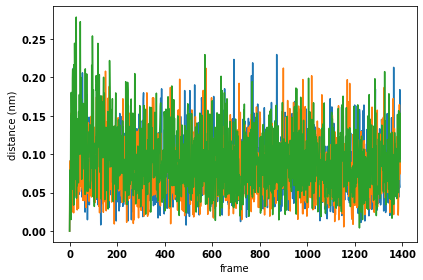

<ipython-input-75-106d6d0e3249>:203: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(traj_distances[:,j], bins=100, normed=True)
<ipython-input-75-106d6d0e3249>:203: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(traj_distances[:,j], bins=100, normed=True)
<ipython-input-75-106d6d0e3249>:203: VisibleDeprecationWarning: Passing 

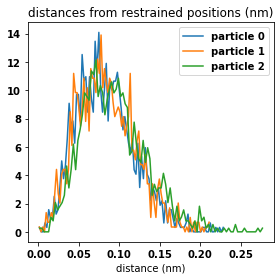

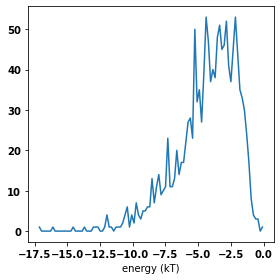

------------------------------------------------------------
REF/RUN0
------------------------------------------------------------
dG1 = 	4.72207987817206
dG2 = 	155.30147557820118 +/- 2.4411765961234573
dG3 = 	-168.41655517104329 +/- 4.751755936694375
dG4 = 	-5.770161603077634 +/- 0.33690996391973765
-----------
dG_binding (units RT)   = -14.163161317747688
dG_binding_uncertainty  = 3.452345050385581
Kd                      = 7.06e-07 M
log_10 Kd               = -6.15
log_10 Kd uncertainty   = 1.50
------------------------------------------------------------




Reading ../data/combined/REF_RL/RUN1/LIG_res.itp ...
...Done.
Restraint indices: [11, 25, 2]
Reading ../data/combined/REF_RL/RUN1/npt.gro ...
boxsize    7.32736   7.32736   7.32736

boxlength 7.32736
Found grolines ['  305LIG    C15   11   0.338   0.304   2.125\n', '  305LIG     C4   25   1.376   7.238   2.219\n', '  305LIG    C12    2   0.608   0.066   1.807\n']
Positions before PBC correction:
[array([0.338, 0.304, 2.125]), 

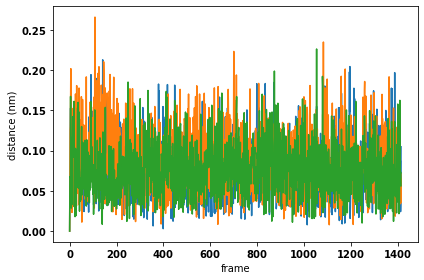

<ipython-input-75-106d6d0e3249>:203: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(traj_distances[:,j], bins=100, normed=True)
<ipython-input-75-106d6d0e3249>:203: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(traj_distances[:,j], bins=100, normed=True)
<ipython-input-75-106d6d0e3249>:203: VisibleDeprecationWarning: Passing 

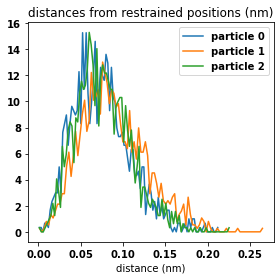

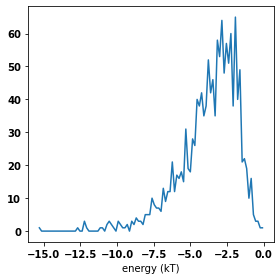

------------------------------------------------------------
REF/RUN1
------------------------------------------------------------
dG1 = 	3.5994078567162764
dG2 = 	161.86802678515008 +/- 0.7076486382321928
dG3 = 	-177.91418000579628 +/- 3.6689910650090103
dG4 = 	-6.3534644591699285 +/- 0.4736104818441531
-----------
dG_binding (units RT)   = -18.80020982309985
dG_binding_uncertainty  = 1.000766301582819
Kd                      = 6.84e-09 M
log_10 Kd               = -8.16
log_10 Kd uncertainty   = 0.43
------------------------------------------------------------




Reading ../data/combined/REF_RL/RUN2/LIG_res.itp ...
...Done.
Restraint indices: [13, 19, 9]
Reading ../data/combined/REF_RL/RUN2/npt.gro ...
boxsize    7.27781   7.27781   7.27781

boxlength 7.27781
Found grolines ['  305LIG     CL   13   1.306   7.066   2.124\n', '  305LIG    C13   19   0.265   0.342   1.981\n', '  305LIG     C2    9   1.178   0.090   2.359\n']
Positions before PBC correction:
[array([1.306, 7.066, 2.124])

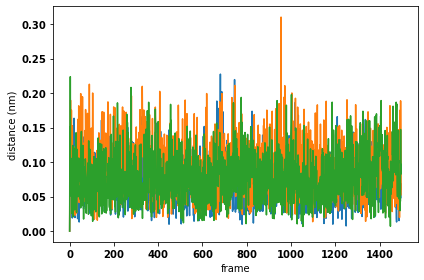

<ipython-input-75-106d6d0e3249>:203: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(traj_distances[:,j], bins=100, normed=True)
<ipython-input-75-106d6d0e3249>:203: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  counts, bin_edges = np.histogram(traj_distances[:,j], bins=100, normed=True)
<ipython-input-75-106d6d0e3249>:203: VisibleDeprecationWarning: Passing 

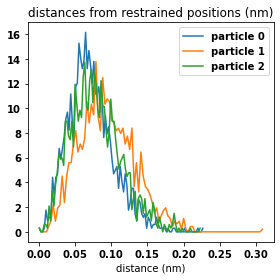

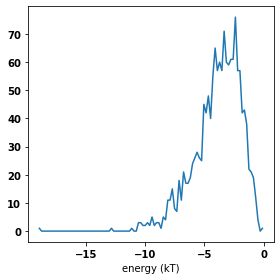

------------------------------------------------------------
REF/RUN2
------------------------------------------------------------
dG1 = 	3.5637309247711104
dG2 = 	174.01044662807524 +/- 2.7987441782232154
dG3 = 	-203.64006324437366 +/- 5.064057615489708
dG4 = 	-5.274392739120932 +/- 0.30484087997354165
-----------
dG_binding (units RT)   = -31.340278430648247
dG_binding_uncertainty  = 3.958021974456014
Kd                      = 2.45e-14 M
log_10 Kd               = -13.61
log_10 Kd uncertainty   = 1.72
------------------------------------------------------------






In [75]:
dataset = 'REF'
prefix = '../data/combined'


verbose = False
debug = False


for run in range(len(glob.glob(f'{prefix}/{dataset}_RL/RUN*'))):
    if verbose:
        print('run', run)
    scraped_RL_feb_path = f'{prefix}/results/{dataset}/scraped_data/{dataset}_RL_RUN{run}_feb.npy'
    scraped_L_feb_path = f'{prefix}/results/{dataset}/scraped_data/{dataset}_L_RUN{run}_feb.npy'
    if verbose:
        print('Looking for scraped_RL_feb_path', scraped_RL_feb_path, os.path.exists(scraped_RL_feb_path))
        print('Looking for scraped_L_feb_path', scraped_L_feb_path, os.path.exists(scraped_L_feb_path))
          
    if not os.path.exists(scraped_RL_feb_path) or not os.path.exists(scraped_L_feb_path):
        continue # skip if we don't have scraped free energies for dG2 and dG3
    
    # Note: all dG are in units kT 
    
    ####################### 
    # Compute dG1 -  the free energy of restraining the ligand in a solution
    #                at standard concentration (analytical)
    
    grofile = f'{prefix}/{dataset}_RL/RUN{run}/npt.gro'
    itpfile = f'{prefix}/{dataset}_RL/RUN{run}/LIG_res.itp'
    
    dG1, rest_function_used = harmonic_analytical.get_dG_harmonic_rest(grofile, itpfile)
    
    ####################### 
    # Compute dG2 -   free energy of decoupling the ligand in solution (EE)
    
    L_increments = np.load(f'{prefix}/results/{dataset}/scraped_data/{dataset}_L_RUN{run}_inc.npy')
    L_fe = np.load(f'{prefix}/results/{dataset}/scraped_data/{dataset}_L_RUN{run}_feb.npy')[:,-1]
    
    increment_threshold = 0.1
    
    for x,i in enumerate(L_increments):
        if i < increment_threshold:
            break
    #print(np.shape(L_fe), x, np.average(L_fe[x:]), L_fe[-1]) # < --- decide which to use
    dG2, dG2_sigma = np.average(L_fe[x:]), np.std(L_fe[x:])
    
    ####################### 
    # Compute dG3 -   free energy of *coupling* the ligand bound to the receptor
    #                 in the presence of restraints (EE)
    
    RL_increments = np.load(f'{prefix}/results/{dataset}/scraped_data/{dataset}_RL_RUN{run}_inc.npy')
    RL_fe = np.load(f'{prefix}/results/{dataset}/scraped_data/{dataset}_RL_RUN{run}_feb.npy')[:,-1]
                    
    for x,i in enumerate(RL_increments):
        if i < increment_threshold:
            last_frames = x*10 # un-stride for later
            break
    #print(np.shape(RL_fe), x, np.average(RL_fe[x:]), RL_fe[-1])
    dG3, dG3_sigma = -np.average(RL_fe[x:]), np.std(RL_fe[x:])
    
    
    ####################### 
    # Compute dG4 -   is the free energy of removing the three position 
    #                 restraints on the ligand bound to the receptor (MBAR)
    
    ### Get the restraint indices from the itpfile
    fin = open(itpfile, 'r')
    lines = fin.readlines()
    fin.close()
    
    rest_lines = [line for line in lines if (line[0] != ';' and line[0] != '[')]
    rest_indices = []
    for line in rest_lines:
        fields = line.strip().split()
        rest_indices.append( int(fields[0]) )
    if verbose:
        print('rest_indices', rest_indices)

    
    # Make sure we have the starting grofile and xtc traj file
    xtc_path = f'{prefix}/{dataset}_RL/RUN{run}/traj_comp.xtc'
    if not os.path.exists(xtc_path):
        raise Exception(f"Can't find {xtc_path}!")
    npt_gro_path = f'{prefix}/{dataset}_RL/RUN{run}/npt.gro'
    if not os.path.exists(npt_gro_path):
        raise Exception(f"Can't find {npt_gro_path}!")
    
    # check to see if we have built a gro file for the xtc
    traj_comp_gro_path = f'{prefix}/{dataset}_RL/RUN{run}/traj_comp.gro'
    if not os.path.exists(traj_comp_gro_path):
        
        if verbose:
            print(f'Could not find {traj_comp_gro_path} , now making one...')
        # check to see if the current index file has the Protein_LIG atom group
        index_path = f'{prefix}/{dataset}_RL/RUN{run}/index.ndx'
        index_traj_comp_path = f'{prefix}/{dataset}_RL/RUN{run}/traj_comp.ndx'
        fin = open(index_path, 'r')
        index_text = fin.read()
        fin.close()
        
        # Find the indices of the [ Protein ] and [ LIG ] the atom groups
        directives = [line for line in index_text.split('\n') if (line.count('[ ') > 0)]
        protein_index = directives.index('[ Protein ]')
        lig_index = directives.index('[ LIG ]')
        
        has_Protein_LIG_group = (index_text.count('Protein_LIG') > 0)
        if not has_Protein_LIG_group:
            # make a new atom_group for Protein_LIG
            cmd = f'echo "{protein_index}|{lig_index}\\nq\\n" | gmx make_ndx -n {index_path} -o {index_traj_comp_path}'
            if verbose:
                print('>>', cmd)    
            os.system(cmd)
            protein_lig_index = len(directives)  # the new one we just added          
        else:
            protein_lig_index = directives.index('[ Protein_LIG ]')  
        
        # save a traj_comp.gro with these atoms
        cmd = f'echo "{protein_lig_index}\\n" | gmx editconf -f {npt_gro_path} -n {index_traj_comp_path} -o {traj_comp_gro_path}'
        if verbose:
            print('>>', cmd)    
        os.system(cmd)
        
    # Read in the traj_comp.xtc trajectory data      
    traj = md.load(xtc_path, top=traj_comp_gro_path)
    if debug:
        print('traj.xyz.shape', traj.xyz.shape)
    
    # slice out only the restrained atoms
    Ind = np.array([i-1 for i in rest_indices])
    traj_positions = traj.xyz[:,Ind,:]
    traj_initial_position = traj_positions[0,:,:]
    if debug:
        print('traj_positions', traj_positions)
    
    # compile all possible periodic translations
    pbc_vecs = traj.unitcell_vectors[0]  # there are pbc vecs for each *frame*, we just take from the first frame
    if debug:
        print('pbc_vecs', pbc_vecs)
    all_pbc_translations = []
    for i in [-1., 0., 1.]:
        for j in [-1., 0., 1.]:
            for k in [-1., 0., 1.]:
                all_pbc_translations.append(i*pbc_vecs[0,:] + j*pbc_vecs[1,:] + k*pbc_vecs[2,:])
    all_pbc_translations = np.array(all_pbc_translations)
    if debug:
        print('all_pbc_translations', all_pbc_translations)
        print('all_pbc_translations.shape', all_pbc_translations.shape)
    
    # correct each frame
    traj_positions_corrected = np.zeros(traj_positions.shape)
    nframes, nparticles, ndims = traj_positions.shape[0], traj_positions.shape[1], traj_positions.shape[2]
    for i in range(nframes):
        for j in range(nparticles):
            all_images = all_pbc_translations + traj_positions[i,j,:]
            all_displacements_from_initial = all_images - traj_initial_position[j,:]
            all_sqdistances = np.sum(all_displacements_from_initial*all_displacements_from_initial, axis=1)
            # pick the closest image
            traj_positions_corrected[i,j,:] = all_images[np.argmin(all_sqdistances),:]
    
    # compute the distances
    traj_distances = np.zeros( (nframes, nparticles) )
    for j in range(nparticles):
        traj_displacements = traj_positions_corrected[:,j,:] - traj_positions_corrected[0,j,:]
        traj_distances[:,j] = np.sqrt(np.sum(traj_displacements*traj_displacements, axis=1))
    
    # plot distandes over time
    plt.figure(figsize=(6,4))
    for j in range(nparticles):
        plt.plot(np.arange(nframes), traj_distances[:,j])
    plt.xlabel('frame')
    plt.ylabel('distance (nm)')
    plt.tight_layout()
    plt.show()
    

    plt.figure(figsize=(4,4))
    for j in range(nparticles):
        counts, bin_edges = np.histogram(traj_distances[:,j], bins=100, normed=True)
        bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
        plt.plot(bin_centers, counts, label=f'particle {j}')
    plt.legend(loc='best')
    plt.title('distances from restrained positions (nm)')
    plt.xlabel('distance (nm)')
    plt.tight_layout()
    plt.show()
    
    total_sqdisp_from_first_frame = np.sum(traj_distances*traj_distances, axis=1)
    if debug:
        print('total_sqdisp_from_first_frame', total_sqdisp_from_first_frame)
        print('np.max(total_sqdisp_from_first_frame)', np.max(total_sqdisp_from_first_frame))
    
    RT = 2.479 # RT in in kJ/mol at 298 K
    kvalue = 800.0 # kJ/mol/nm^2
    du_10 = -1.0*kvalue/2.0*total_sqdisp_from_first_frame/RT  # reduced du's of turning the restraint off.
    if debug:
        print('du_10', du_10)
        print('np.min(du_10)', np.min(du_10))
        print('np.mean( np.exp(-1.0*du_10)', np.mean( np.exp(-1.0*du_10)))
    
    plt.figure(figsize=(4,4))
    counts, bin_edges = np.histogram(du_10, bins=100)
    bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
    plt.plot(bin_centers, counts)
    plt.xlabel('energy (kT)')
    plt.tight_layout()
    plt.show()
    
    ### DONT USE EXP averageing for free energy estimation  -- to o much bias
    dG4 = -1.0*np.log( np.mean( np.exp(-1.0*du_10) ) )
    if debug:
        print('dG4_EXP', dG4)

    
    du_10_subsampled = du_10[::20]  # subsample to 5%
    dG4_BAR, dG4_BAR_sigma = pymbar.BAR(du_10_subsampled, np.array([0]), DeltaF=0.0, compute_uncertainty=True, uncertainty_method='BAR')
    #               maximum_iterations=500, relative_tolerance=1e-12,
    #               verbose=False, method='false-position', iterated_solution=True, return_dict=False)
    if verbose:
        print('dG4_BAR', dG4_BAR)

    
    dG_binding = dG1 + dG2 + dG3 + dG4_BAR
    dG_binding_sigma = np.sqrt( dG2_sigma**2 + dG2_sigma**2 )
    Kd = np.exp(dG_binding)
    
    log_Kd_sigma = dG_binding_sigma/np.log(10)
    
    print('------------------------------------------------------------')
    print(f'{dataset}/RUN{run}')
    print('------------------------------------------------------------')
    print(f'dG1 = \t{dG1}')
    print(f'dG2 = \t{dG2} +/- {dG2_sigma}')
    print(f'dG3 = \t{dG3} +/- {dG3_sigma}')
    print(f'dG4 = \t{dG4_BAR} +/- {dG4_BAR_sigma}')
    print('-----------')
    print(f'dG_binding (units RT)   = {dG_binding}')
    print(f'dG_binding_uncertainty  = {dG_binding_sigma}')
    print(f'Kd                      = %3.2e M'%Kd)
    print(f'log_10 Kd               = %3.2f'%np.log10(Kd) )
    print(f'log_10 Kd uncertainty   = %3.2f'%log_Kd_sigma )
    print('------------------------------------------------------------')
    print('\n\n\n')

    
    
    
    

In [ ]:
import mdtraj as md
traj = md.load('REF_RL/RUN0/traj_comp.xtc',top='REF_RL/RUN0/xtc.gro')
print([a.index for a in traj.topology.atoms if a.residue.name == 'LIG'])
# NOTE that if you want LIG atoms you have to specify a.index < ~200
# bc some other residues got re-named :\

In [ ]:
40 + 259 + 217

In [ ]:
f = np.random.random( (3,3) )
print(f)

print(f-f[0,:])

In [48]:
import pymbar

In [49]:
help(pymbar.BAR)

Help on function BAR in module pymbar.bar:

BAR(w_F, w_R, DeltaF=0.0, compute_uncertainty=True, uncertainty_method='BAR', maximum_iterations=500, relative_tolerance=1e-12, verbose=False, method='false-position', iterated_solution=True, return_dict=False)
    Compute free energy difference using the Bennett acceptance ratio (BAR) method.
    
    Parameters
    ----------
    w_F : np.ndarray
        w_F[t] is the forward work value from snapshot t.
        t = 0...(T_F-1)  Length T_F is deduced from vector.
    w_R : np.ndarray
        w_R[t] is the reverse work value from snapshot t.
        t = 0...(T_R-1)  Length T_R is deduced from vector.
    DeltaF : float, optional, default=0.0
        DeltaF can be set to initialize the free energy difference with a guess
    compute_uncertainty : bool, optional, default=True
        if False, only the free energy is returned
    uncertainty_method: string, optional, default=BAR
        There are two possible uncertainty estimates for BAR.  One